In [30]:
import os
os.chdir(r'C:\Users\orger\VScodeProjects\RawDatConversion')

In [81]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import trange
from numcodecs import Blosc

In [32]:
filepath = Path(r"F:\20221204\h2bhuc_f01_4dpf\dat_process\h2bhuc_f01_4dpf_02.zarr")

In [33]:
ds = zarr.open(filepath,mode='r')
ds.shape

(2495, 141, 450, 399)

In [34]:
snap = ds[:,:41,:60,:80]


In [35]:
snap.shape

(2495, 41, 60, 80)

[(1028.0, 1034.0)]

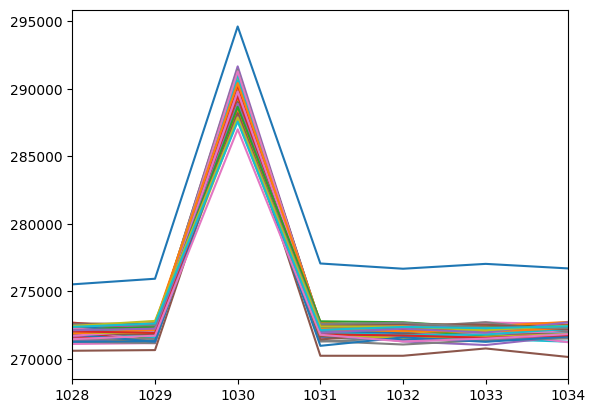

In [36]:
intensity = np.sum(snap, axis=(1,2))
fig, ax = plt.subplots()
ax.plot(intensity)
ax.set(
    xlim=[1028,1034]
)

In [37]:
list(ds.attrs.items())

[('FID_fin', [2258820, 2259071]),
 ('FID_init', [1614708, 1614959]),
 ('FID_off', 1830759),
 ('FID_on', 1828488),
 ('FID_stim_ix', 772992),
 ('VID_fin', 6601),
 ('VID_init', 4097),
 ('VID_off', 4932),
 ('VID_on', 4932),
 ('VID_stim_ix', 831),
 ('exp_name', 'h2bhuc_f01_4dpf_run2'),
 ('post_stim_time', 600),
 ('pre_stim_time', 300),
 ('vol_rate', 2.780307692307692)]

In [38]:
6601 - 4097, ds.shape[0]

(2504, 2495)

In [80]:
dims = ds.shape
(dims[0]-1,)+dims[1:]

(2494, 141, 450, 399)

In [82]:
compressor = Blosc(cname='zstd', clevel=5, shuffle=Blosc.BITSHUFFLE)
z_arr_clean = zarr.open(f'{filepath.parent}/h2bhuc_f01_4dpf_02_cleaned.zarr', 
                    mode='w', 
                    shape=(dims[0]-1,)+dims[1:],
                    chunks=(1, None),
                    compressor=compressor,
                    dtype=np.uint16,)
offset=0
timepoints = dims[0]
for i in trange(timepoints):
        if i == 1030:
                offset+=1
                pass
        z_arr_clean.oindex[i-offset] = ds.oindex[i]

100%|██████████| 2495/2495 [13:23<00:00,  3.11it/s]


[]

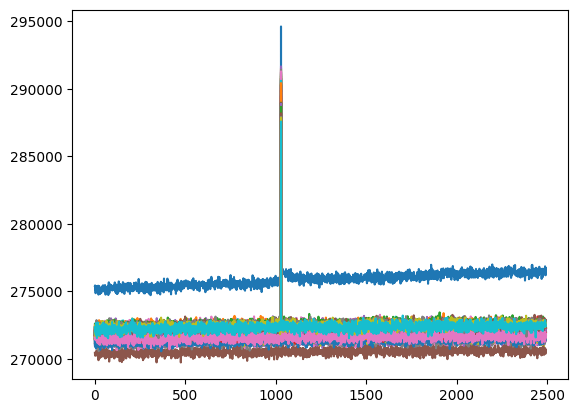

In [83]:
snap = z_arr_clean[:,:41,:60,:80]
intensity = np.sum(snap, axis=(1,2))
fig, ax = plt.subplots()
ax.plot(intensity)
ax.set(
    # xlim=[1028,1034]
)

In [71]:
ds.get_orthogonal_selection(slice(0,1030))

array([[[[115, 114, 113, ..., 110, 102, 113],
         [115, 108, 109, ..., 113, 109, 113],
         [112, 107, 110, ..., 110, 111, 114],
         ...,
         [113, 114, 112, ..., 108, 116, 107],
         [113, 114, 113, ..., 116, 114, 108],
         [112, 109, 114, ..., 108,  98, 108]],

        [[109, 114, 106, ..., 107, 104, 110],
         [112, 112, 110, ..., 112, 110, 108],
         [108, 104, 111, ..., 110, 115, 110],
         ...,
         [112, 112, 107, ..., 112, 111, 109],
         [112, 111, 114, ..., 101, 111, 109],
         [114, 110, 111, ..., 105, 111, 108]],

        [[113, 108, 117, ..., 108, 105, 108],
         [112, 110, 110, ..., 111, 110, 114],
         [110, 100, 113, ..., 109, 112, 108],
         ...,
         [106, 116, 110, ..., 108, 113, 112],
         [112, 111, 109, ..., 111, 106, 113],
         [110, 112, 110, ..., 114, 136, 107]],

        ...,

        [[114, 109, 114, ..., 112, 104, 110],
         [115, 109, 110, ..., 113, 113, 112],
         [116, 104